<span style="font-size:50px;">🌤️</span>
<span style="color:#70B7FF; font-size:50px; font-weight:bold;">
 Air Quality Forecasting System
 </span>
 <p align="center">
   <img src="https://img.freepik.com/premium-vector/air-quality-index-aqi-measurement-air-quality-index-scale-aqi-measurement-technique-air-quality-levels_1156220-405.jpg" width="900" height="400"/>
 </p>

 **Project Overview**: Predict future air pollution levels using LSTM neural networks

 **Dataset**: US Pollution Data (2000-2016) - 1.7M+ records  
 **Target**: O3 (Ozone) Mean concentrations  
 **Model**: LSTM Deep Learning with optimized architecture


Import Libraries

In [ ]:
# IMPORT REQUIRED LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle
import warnings
from datetime import datetime

# Machine Learning & Preprocessing
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Settings
warnings.filterwarnings('ignore')
np.random.seed(42)
tf.random.set_seed(42)

# Visualization settings
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)
plt.rcParams["font.size"] = 11

print("✅ All libraries imported successfully")


✅ All libraries imported successfully


 Data Loading & Initial Exploration


In [ ]:
# LOAD DATASET

print("LOADING US POLLUTION DATASET (2000-2016)")

# Load the large pollution dataset
df = pd.read_csv('/content/drive/MyDrive/pollution_us_2000_2016.csv')

print(f"\n✅ Dataset loaded successfully")
print(f" Dataset Shape: {df.shape}")


LOADING US POLLUTION DATASET (2000-2016)

✅ Dataset loaded successfully
 Dataset Shape: (1746661, 29)


In [ ]:
# DISPLAY FIRST FEW ROWS

print("FIRST 5 ROWS OF THE DATASET")
df.head()


FIRST 5 ROWS OF THE DATASET


,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


In [ ]:
# DATASET STRUCTURE
print("DATASET INFORMATION")
print(df.info())

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25

In [ ]:
# COLUMN NAMES AND DATA TYPES

print("COLUMN NAMES AND DATA TYPES")

column_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum()
})
print(column_info.to_string())

COLUMN NAMES AND DATA TYPES
                              Column Data Type  Non-Null Count  Null Count
Unnamed: 0                Unnamed: 0     int64         1746661           0
State Code                State Code     int64         1746661           0
County Code              County Code     int64         1746661           0
Site Num                    Site Num     int64         1746661           0
Address                      Address    object         1746661           0
State                          State    object         1746661           0
County                        County    object         1746661           0
City                            City    object         1746661           0
Date Local                Date Local    object         1746661           0
NO2 Units                  NO2 Units    object         1746661           0
NO2 Mean                    NO2 Mean   float64         1746661           0
NO2 1st Max Value  NO2 1st Max Value   float64         1746661          

In [ ]:
# STATISTICAL SUMMARY

print("STATISTICAL SUMMARY - NUMERIC FEATURES")
print(df.describe())

STATISTICAL SUMMARY - NUMERIC FEATURES
         Unnamed: 0    State Code   County Code      Site Num      NO2 Mean  \
count  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06   
mean   5.471414e+04  2.230907e+01  7.169381e+01  1.118214e+03  1.282193e+01   
std    3.372908e+04  1.725621e+01  7.948023e+01  2.003103e+03  9.504814e+00   
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00 -2.000000e+00   
25%    2.575300e+04  6.000000e+00  1.700000e+01  9.000000e+00  5.750000e+00   
50%    5.304500e+04  1.700000e+01  5.900000e+01  6.000000e+01  1.073913e+01   
75%    8.033600e+04  4.000000e+01  9.700000e+01  1.039000e+03  1.771364e+01   
max    1.345750e+05  8.000000e+01  6.500000e+02  9.997000e+03  1.395417e+02   

       NO2 1st Max Value  NO2 1st Max Hour       NO2 AQI       O3 Mean  \
count       1.746661e+06      1.746661e+06  1.746661e+06  1.746661e+06   
mean        2.541485e+01      1.173102e+01  2.389822e+01  2.612485e-02   
std         1.599963e+01   

## <span style="color:#70B7FF">🧹 Data Preprocessing</span>

 This section covers:
 1. **Handling Missing Values** - Detection and treatment
 2. **Data Cleaning** - Removing duplicates and invalid entries
 3. **Categorical Variables** - Encoding and transformation
 4. **Feature Engineering** - Creating time-based features
 5. **Data Splitting** - Train/validation/test split
 6. **Normalization** - Scaling for neural networks

In [ ]:
# STEP 1: MISSING VALUES ANALYSIS

# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percentage.values
})

# Show only columns with missing values
missing_df_filtered = missing_df[missing_df['Missing Count'] > 0].sort_values(
    'Missing Count', ascending=False
)

print("\n📊 Columns with Missing Values:")
print(missing_df_filtered.to_string(index=False))


📊 Columns with Missing Values:
 Column  Missing Count  Percentage
 CO AQI         873323   49.999571
SO2 AQI         872907   49.975754


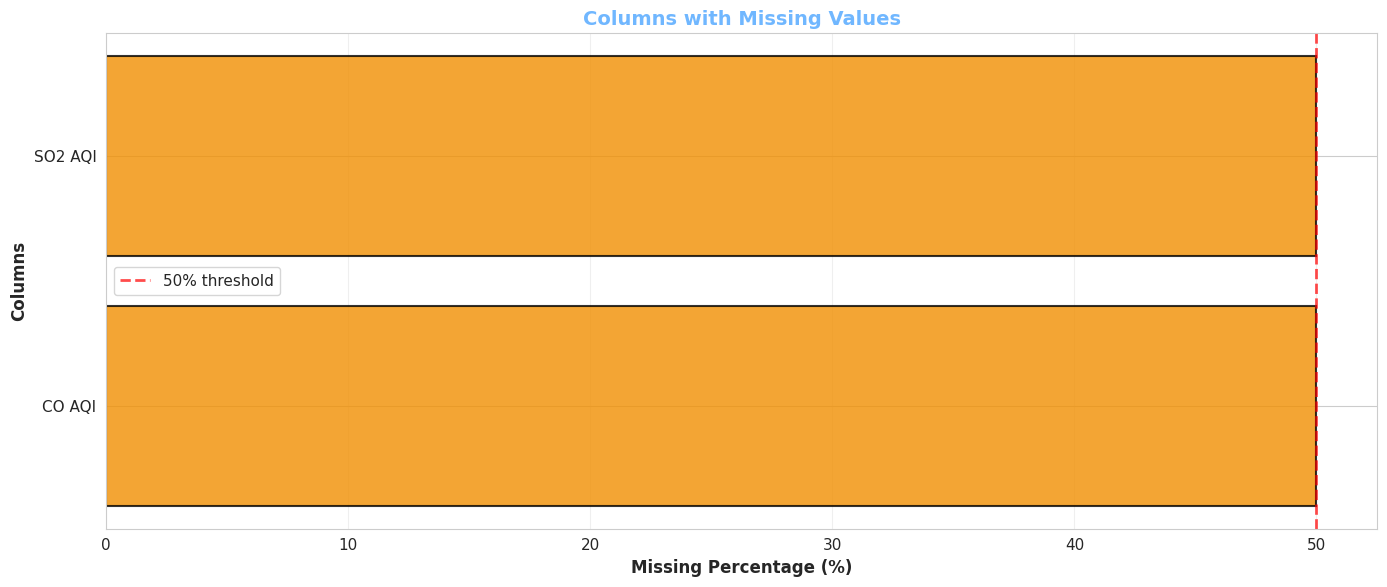


✅ Total columns with missing values: 2


In [ ]:
# Visualize missing values
plt.figure(figsize=(14, 6))
missing_v = missing_df_filtered.head(15)
plt.barh(missing_v['Column'], missing_v['Percentage'],
         color='#F18F01', alpha=0.8, edgecolor='black', linewidth=1.5)
plt.xlabel('Missing Percentage (%)', fontsize=12, fontweight='bold')
plt.ylabel('Columns', fontsize=12, fontweight='bold')
plt.title('Columns with Missing Values', fontsize=14, fontweight='bold', color='#70B7FF')
plt.axvline(x=50, color='red', linestyle='--', linewidth=2, alpha=0.7, label='50% threshold')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n✅ Total columns with missing values: {len(missing_df_filtered)}")

In [ ]:
# STEP 2: HANDLING MISSING VALUES

# Strategy:
# 1. SO2 AQI & CO AQI (~50% missing): Drop these columns (not critical for O3 prediction)

print("🎯 Missing Value Strategy:")
print("   • SO2 AQI & CO AQI (~50% missing) → DROP COLUMNS")

df_clean = df.drop(columns=['CO AQI', 'SO2 AQI']).copy()

print(f"✅ Data is cleaned")


🎯 Missing Value Strategy:
   • SO2 AQI & CO AQI (~50% missing) → DROP COLUMNS
✅ Data is cleaned


In [ ]:
# STEP 3: DATA CLEANING - DUPLICATES

print("STEP 3: DUPLICATE RECORDS")


# Check for duplicate rows
duplicates_before = df_clean.duplicated().sum()
print(f"📊 Duplicate rows found: {duplicates_before:,}")

if duplicates_before > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"✅ Removed {duplicates_before:,} duplicate rows")
    print(f"📊 Dataset size after duplicate removal: {len(df_clean):,}")
else:
    print("✅ No duplicate rows found")

STEP 3: DUPLICATE RECORDS
📊 Duplicate rows found: 0
✅ No duplicate rows found


In [ ]:
# STEP 4: CATEGORICAL VARIABLES ENCODING

# Identify categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()
print(f"\n📋 Categorical columns found: {len(categorical_cols)}")
print(f"    Columns: {categorical_cols[:5]}...")

# Encode State column (important for regional pollution patterns)
if 'State' in df_clean.columns:
    print("\n🏷️ Encoding 'State' column using LabelEncoder...")
    state_encoder = LabelEncoder()
    df_clean['State_Encoded'] = state_encoder.fit_transform(df_clean['State'].astype(str))
    print(f"✅ States encoded: {len(state_encoder.classes_)} unique states")

    # Save encoder for deployment
    with open('/content/drive/MyDrive/models/state_encoder.pkl', 'wb') as f:
         pickle.dump(state_encoder, f)

    print("✅ State encoder saved to: models/state_encoder.pkl")

# Encode City column
if 'City' in df_clean.columns:
    print("\n🏙️ Encoding 'City' column using LabelEncoder...")
    city_encoder = LabelEncoder()
    df_clean['City_Encoded'] = city_encoder.fit_transform(df_clean['City'].astype(str))
    print(f"✅ Cities encoded: {len(city_encoder.classes_)} unique cities")

print("\n✅ Categorical encoding completed successfully")



📋 Categorical columns found: 9
    Columns: ['Address', 'State', 'County', 'City', 'Date Local']...

🏷️ Encoding 'State' column using LabelEncoder...
✅ States encoded: 47 unique states
✅ State encoder saved to: models/state_encoder.pkl

🏙️ Encoding 'City' column using LabelEncoder...
✅ Cities encoded: 144 unique cities

✅ Categorical encoding completed successfully


In [ ]:
# STEP 5: DATE PROCESSING & FEATURE ENGINEERING

print("STEP 5: DATE PROCESSING & FEATURE ENGINEERING")

# Convert date column to datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date Local'], errors='coerce')

# Remove rows with invalid dates
df_clean = df_clean.dropna(subset=['Date'])

# Extract temporal features (critical for capturing seasonality)
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Day'] = df_clean['Date'].dt.day
df_clean['DayOfWeek'] = df_clean['Date'].dt.dayofweek
df_clean['Quarter'] = df_clean['Date'].dt.quarter
df_clean['DayOfYear'] = df_clean['Date'].dt.dayofyear

# Create cyclical features (better representation of seasonal patterns)
df_clean['Month_Sin'] = np.sin(2 * np.pi * df_clean['Month'] / 12)
df_clean['Month_Cos'] = np.cos(2 * np.pi * df_clean['Month'] / 12)
df_clean['DayOfYear_Sin'] = np.sin(2 * np.pi * df_clean['DayOfYear'] / 365)
df_clean['DayOfYear_Cos'] = np.cos(2 * np.pi * df_clean['DayOfYear'] / 365)

print("✅ Extracted temporal features:")
print("   • Linear: Year, Month, Day, DayOfWeek, Quarter, DayOfYear")
print("   • Cyclical: Month_Sin/Cos, DayOfYear_Sin/Cos")

# Sort by date (CRITICAL for time series analysis)
df_clean = df_clean.sort_values('Date').reset_index(drop=True)

print(f"\n📅 Date range: {df_clean['Date'].min().strftime('%Y-%m-%d')} to {df_clean['Date'].max().strftime('%Y-%m-%d')}")
print(f"📊 Total time span: {(df_clean['Date'].max() - df_clean['Date'].min()).days:,} days")


STEP 5: DATE PROCESSING & FEATURE ENGINEERING
✅ Extracted temporal features:
   • Linear: Year, Month, Day, DayOfWeek, Quarter, DayOfYear
   • Cyclical: Month_Sin/Cos, DayOfYear_Sin/Cos

📅 Date range: 2000-01-01 to 2016-05-31
📊 Total time span: 5,995 days


In [ ]:
# STEP 6: DAILY AGGREGATION (CRITICAL FOR STABLE PREDICTIONS)

print("STEP 6: DAILY AGGREGATION")

print("🎯 Aggregation Strategy:")
print("   • Group by Date and compute daily MEAN")
print("   • This ensures one measurement per day")
print("   • Reduces noise and improves model stability")

# Define target variable
target_col = 'O3 Mean'

# Aggregate by date - take mean of all measurements per day
df_daily = df_clean.groupby('Date').agg({
    target_col: 'mean',
    'NO2 Mean': 'mean',
    'SO2 Mean': 'mean',
    'CO Mean': 'mean',
    'Month': 'first',
    'DayOfYear': 'first',
    'Month_Sin': 'first',
    'Month_Cos': 'first',
    'DayOfYear_Sin': 'first',
    'DayOfYear_Cos': 'first'
}).reset_index()

print(f"\n📊 Before aggregation: {len(df_clean):,} rows (multiple measurements per day)")
print(f"📊 After aggregation: {len(df_daily):,} rows (one value per day)")
print(f"📅 Daily coverage: {len(df_daily)} days of continuous data")

# Use aggregated data for modeling
df_model = df_daily.copy()

print(f"\n✅ Final dataset statistics:")
print(f"   • Mean {target_col}: {df_model[target_col].mean():.4f} ppm")
print(f"   • Std  {target_col}: {df_model[target_col].std():.4f} ppm")
print(f"   • Min  {target_col}: {df_model[target_col].min():.4f} ppm")
print(f"   • Max  {target_col}: {df_model[target_col].max():.4f} ppm")


STEP 6: DAILY AGGREGATION
🎯 Aggregation Strategy:
   • Group by Date and compute daily MEAN
   • This ensures one measurement per day
   • Reduces noise and improves model stability

📊 Before aggregation: 1,746,661 rows (multiple measurements per day)
📊 After aggregation: 5,996 rows (one value per day)
📅 Daily coverage: 5996 days of continuous data

✅ Final dataset statistics:
   • Mean O3 Mean: 0.0254 ppm
   • Std  O3 Mean: 0.0072 ppm
   • Min  O3 Mean: 0.0071 ppm
   • Max  O3 Mean: 0.0467 ppm


STEP 7: OUTLIER DETECTION & TREATMENT
📊 Outlier Statistics for O3 Mean:
   • Q1 (25th percentile): 0.0195 ppm
   • Q3 (75th percentile): 0.0312 ppm
   • IQR: 0.0117 ppm
   • Lower bound: 0.0020 ppm
   • Upper bound: 0.0487 ppm
   • Outliers detected: 0 (0.00%)


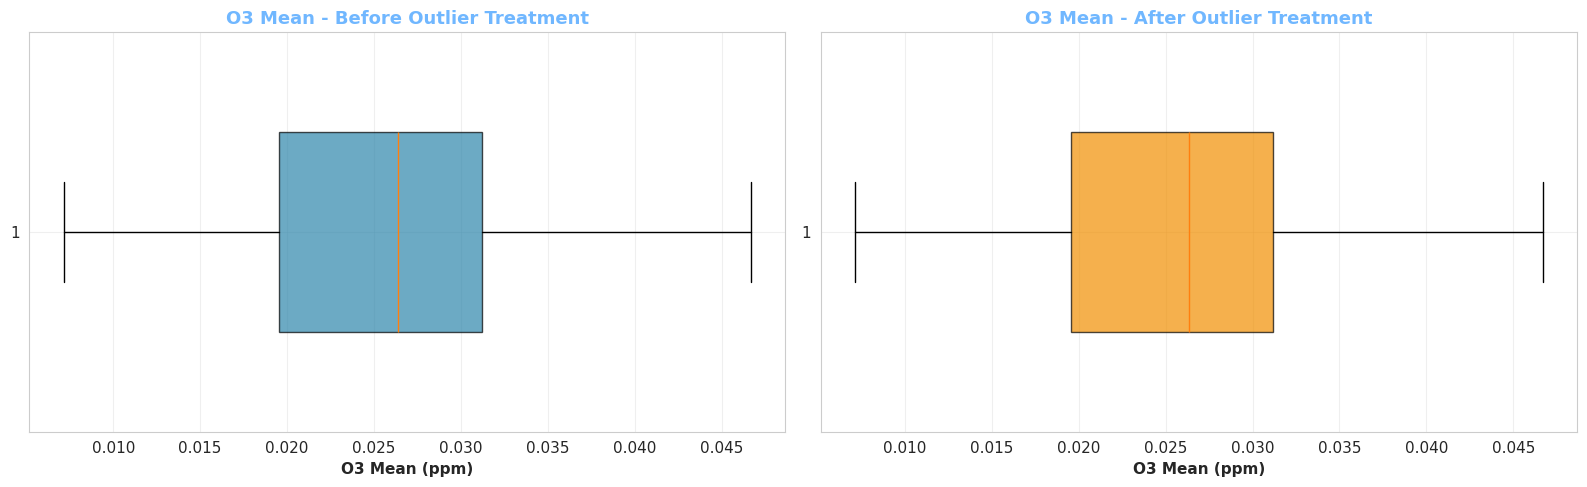


🔧 Treatment strategy: Capping extreme values to IQR bounds
✅ Outliers capped successfully


In [ ]:
# STEP 7: OUTLIER DETECTION & TREATMENT

print("STEP 7: OUTLIER DETECTION & TREATMENT")

# Calculate outlier bounds using IQR (Interquartile Range) method
Q1 = df_model[target_col].quantile(0.25)
Q3 = df_model[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_model[(df_model[target_col] < lower_bound) | (df_model[target_col] > upper_bound)]

print(f"📊 Outlier Statistics for {target_col}:")
print(f"   • Q1 (25th percentile): {Q1:.4f} ppm")
print(f"   • Q3 (75th percentile): {Q3:.4f} ppm")
print(f"   • IQR: {IQR:.4f} ppm")
print(f"   • Lower bound: {lower_bound:.4f} ppm")
print(f"   • Upper bound: {upper_bound:.4f} ppm")
print(f"   • Outliers detected: {len(outliers):,} ({(len(outliers)/len(df_model)*100):.2f}%)")

# Visualize outliers before and after treatment
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Before treatment
axes[0].boxplot(df_model[target_col], vert=False, widths=0.5, patch_artist=True,
                boxprops=dict(facecolor='#2E86AB', alpha=0.7))
axes[0].set_title(f'{target_col} - Before Outlier Treatment',
                  fontsize=13, fontweight='bold', color='#70B7FF')
axes[0].set_xlabel(f'{target_col} (ppm)', fontsize=11, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Cap outliers to preserve extreme pollution events while limiting anomalies
df_model[target_col] = df_model[target_col].clip(lower=lower_bound, upper=upper_bound)

# After treatment
axes[1].boxplot(df_model[target_col], vert=False, widths=0.5, patch_artist=True,
                boxprops=dict(facecolor='#F18F01', alpha=0.7))
axes[1].set_title(f'{target_col} - After Outlier Treatment',
                  fontsize=13, fontweight='bold', color='#70B7FF')
axes[1].set_xlabel(f'{target_col} (ppm)', fontsize=11, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔧 Treatment strategy: Capping extreme values to IQR bounds")
print("✅ Outliers capped successfully")

 ---
 ## <span style="color:#70B7FF">📈 Exploratory Data Analysis - EDA</span>

 **Professional visualizations including:**
 1.  Time series trends with multiple moving averages
 2.  Distribution analysis with statistical markers
 3.  Seasonal patterns (monthly, quarterly, weekly)
 4.  Correlation heatmap for feature relationships
 5.  Multi-pollutant scatter plots


VISUALIZATION 1: TIME SERIES ANALYSIS


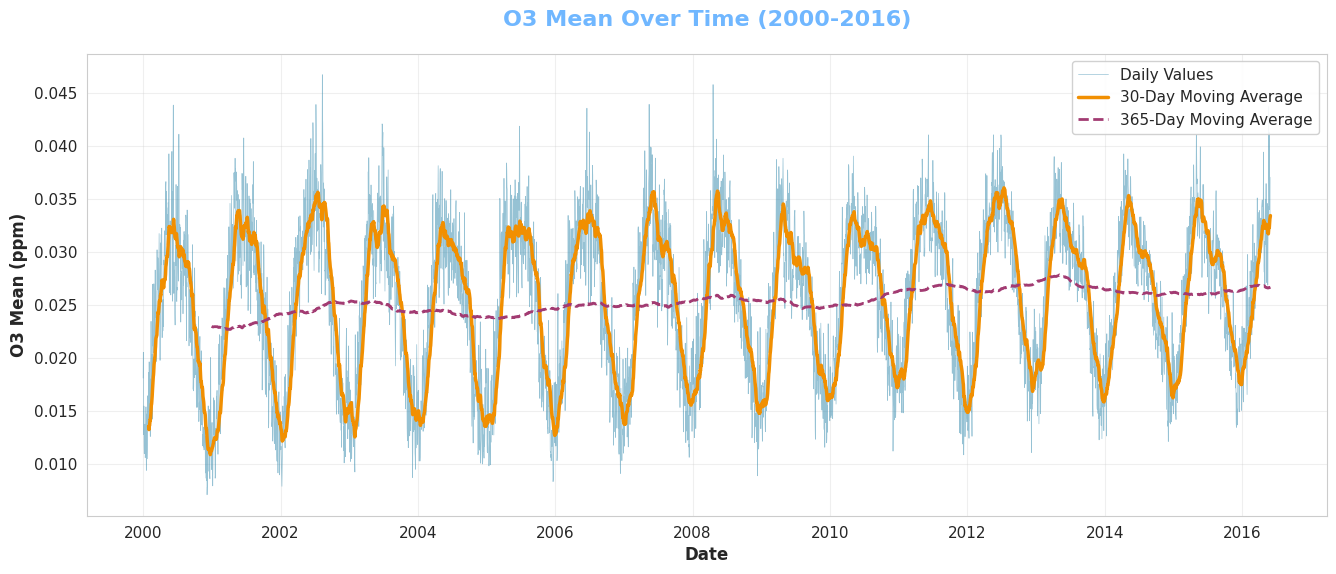

In [ ]:
print("VISUALIZATION 1: TIME SERIES ANALYSIS")
# Set the date column as the index
df_plot = df_model.set_index('Date')

plt.figure(figsize=(16,6))

# Plot daily values
plt.plot(df_plot.index, df_plot[target_col],
         alpha=0.5, linewidth=0.5, color='#2E86AB', label='Daily Values')

# Plot 30-day moving average
plt.plot(df_plot[target_col].rolling(window=30).mean(),
         linewidth=2.5, color='#F18F01', label='30-Day Moving Average')

# Plot 365-day moving average
plt.plot(df_plot[target_col].rolling(window=365).mean(),
         linewidth=2, color='#A23B72', label='365-Day Moving Average', linestyle='--')

# Customize plot
plt.title(f'{target_col} Over Time (2000-2016)',
          fontsize=16, fontweight='bold', color='#70B7FF', pad=20)
plt.ylabel(f'{target_col} (ppm)', fontsize=12, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.legend(loc='upper right', fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.3)
plt.show()


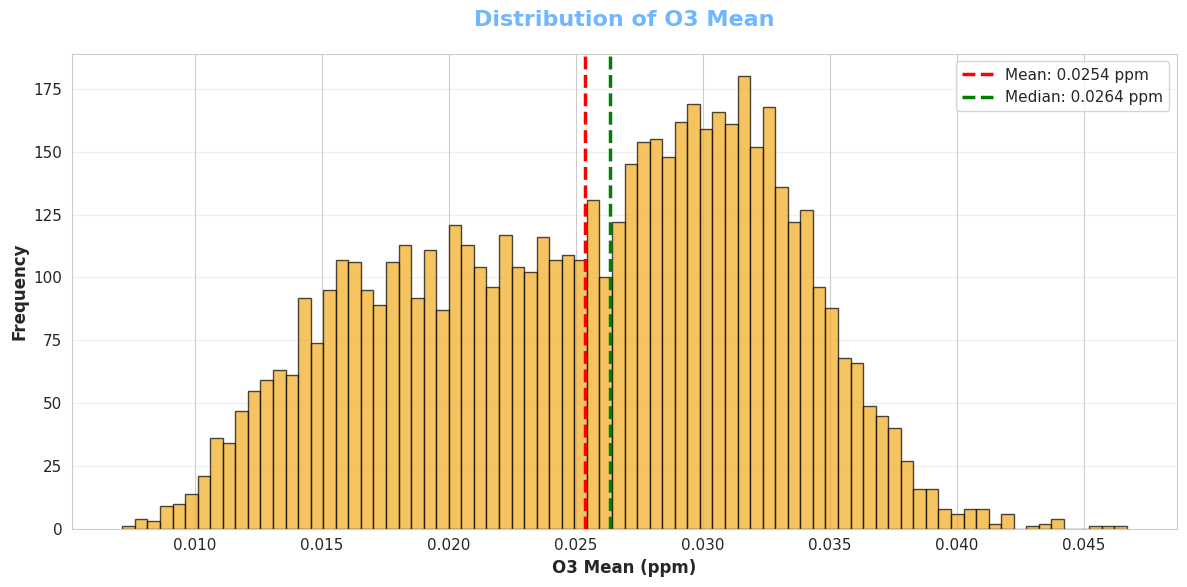

In [ ]:
mean_val = df_plot[target_col].mean()
median_val = df_plot[target_col].median()

plt.figure(figsize=(12,6))
plt.hist(df_plot[target_col], bins=80, edgecolor='black', alpha=0.7, color='#F2AB1E')
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2.5, label=f'Mean: {mean_val:.4f} ppm')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2.5, label=f'Median: {median_val:.4f} ppm')

plt.title(f'Distribution of {target_col}', fontsize=16, fontweight='bold', color='#70B7FF', pad=20)
plt.xlabel(f'{target_col} (ppm)', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


VISUALIZATION 2: SEASONAL PATTERNS


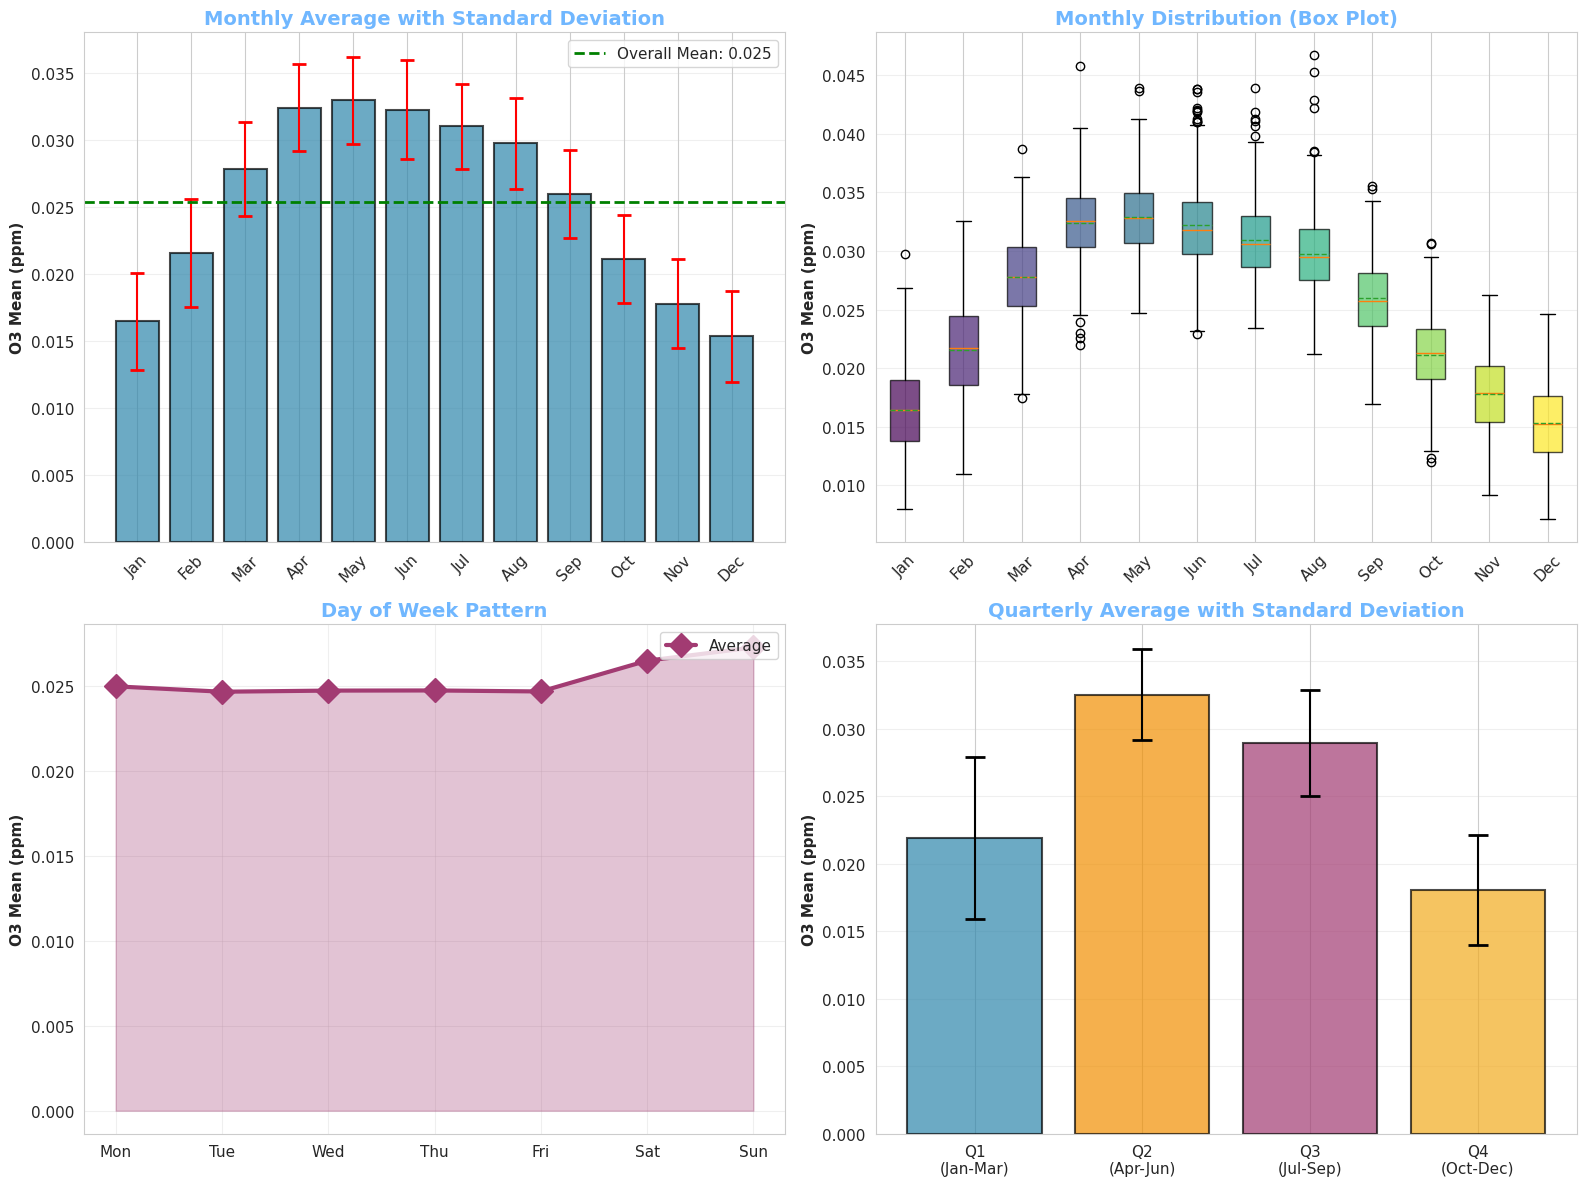

✅ Seasonal visualizations created successfully


In [ ]:
# VISUALIZATION 2: SEASONAL PATTERNS ANALYSIS

print("VISUALIZATION 2: SEASONAL PATTERNS")


fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Monthly patterns with error bars
monthly_data = df_model.groupby('Month')[target_col].agg(['mean', 'std'])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

bars = axes[0, 0].bar(months, monthly_data['mean'],
                      color='#2E86AB', alpha=0.7, edgecolor='black', linewidth=1.5)
axes[0, 0].errorbar(months, monthly_data['mean'], yerr=monthly_data['std'],
                    fmt='none', ecolor='red', capsize=5, capthick=2)
axes[0, 0].axhline(y=monthly_data['mean'].mean(), color='green',
                   linestyle='--', linewidth=2, label=f"Overall Mean: {monthly_data['mean'].mean():.3f}")
axes[0, 0].set_title('Monthly Average with Standard Deviation',
                     fontsize=14, fontweight='bold', color='#70B7FF')
axes[0, 0].set_ylabel(f'{target_col} (ppm)', fontsize=11, fontweight='bold')
axes[0, 0].legend(loc='upper right')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].tick_params(axis='x', rotation=45)

# Box plot by month showing distribution
month_data_list = [df_model[df_model['Month'] == i][target_col].values for i in range(1, 13)]
bp = axes[0, 1].boxplot(month_data_list, labels=months, patch_artist=True,
                         showmeans=True, meanline=True)
colors = plt.cm.viridis(np.linspace(0, 1, 12))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0, 1].set_title('Monthly Distribution (Box Plot)',
                     fontsize=14, fontweight='bold', color='#70B7FF')
axes[0, 1].set_ylabel(f'{target_col} (ppm)', fontsize=11, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].tick_params(axis='x', rotation=45)

# Day of week patterns
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dow_data = df_model.groupby(df_model['Date'].dt.dayofweek)[target_col].mean()
axes[1, 0].plot(dow_names, dow_data.values,
                marker='D', linewidth=3, markersize=12, color='#A23B72', label='Average')
axes[1, 0].fill_between(range(7), dow_data.values, alpha=0.3, color='#A23B72')
axes[1, 0].set_title('Day of Week Pattern',
                     fontsize=14, fontweight='bold', color='#70B7FF')
axes[1, 0].set_ylabel(f'{target_col} (ppm)', fontsize=11, fontweight='bold')
axes[1, 0].legend(loc='upper right')
axes[1, 0].grid(True, alpha=0.3)

# Quarterly patterns with error bars
quarterly_data = df_model.groupby(df_model['Date'].dt.quarter)[target_col].agg(['mean', 'std'])
quarters = ['Q1\n(Jan-Mar)', 'Q2\n(Apr-Jun)', 'Q3\n(Jul-Sep)', 'Q4\n(Oct-Dec)']
x_pos = np.arange(len(quarters))

axes[1, 1].bar(x_pos, quarterly_data['mean'],
               color=['#2E86AB', '#F18F01', '#A23B72', '#F2AB1E'],
               alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1, 1].errorbar(x_pos, quarterly_data['mean'], yerr=quarterly_data['std'],
                    fmt='none', ecolor='black', capsize=7, capthick=2)
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(quarters)
axes[1, 1].set_title('Quarterly Average with Standard Deviation',
                     fontsize=14, fontweight='bold', color='#70B7FF')
axes[1, 1].set_ylabel(f'{target_col} (ppm)', fontsize=11, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✅ Seasonal visualizations created successfully")


VISUALIZATION 3: FEATURE CORRELATIONS


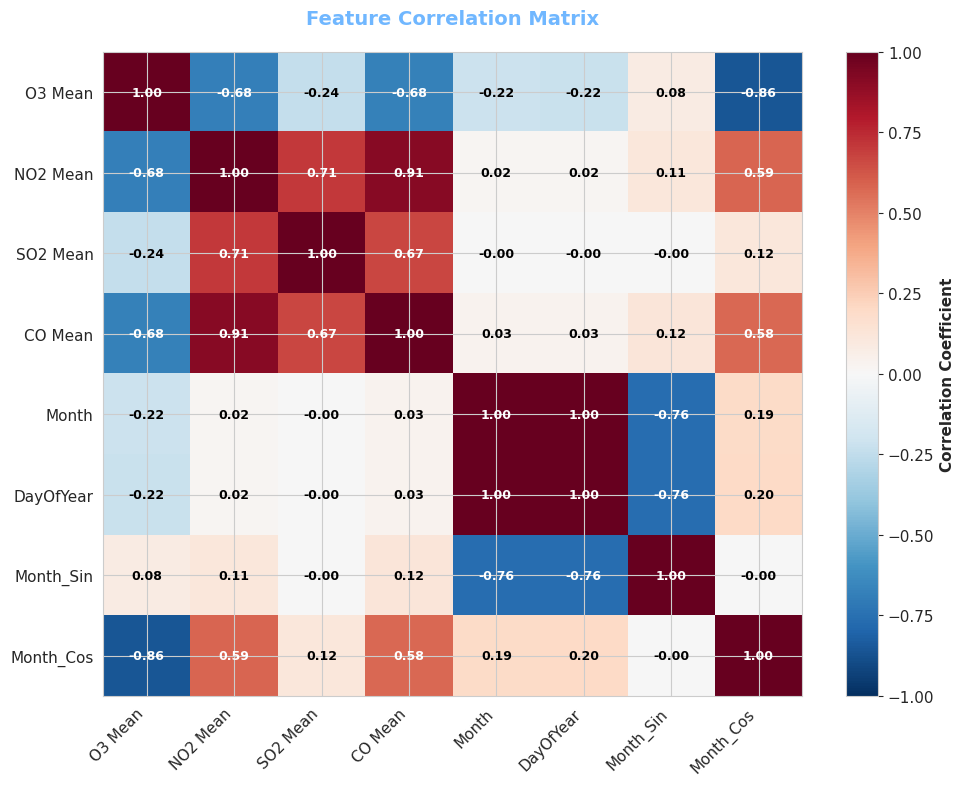

In [ ]:
print("VISUALIZATION 3: FEATURE CORRELATIONS")

# Select numeric features for correlation analysis
numeric_cols = [target_col, 'NO2 Mean', 'SO2 Mean', 'CO Mean',
                'Month', 'DayOfYear', 'Month_Sin', 'Month_Cos']
corr_data = df_model[numeric_cols].corr()  # Compute correlation matrix

# Create a single subplot
fig, ax = plt.subplots(figsize=(10, 8))

# Draw heatmap of correlations
im = ax.imshow(corr_data, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
ax.set_xticks(np.arange(len(numeric_cols)))
ax.set_yticks(np.arange(len(numeric_cols)))
ax.set_xticklabels(numeric_cols, rotation=45, ha='right')
ax.set_yticklabels(numeric_cols)
ax.set_title('Feature Correlation Matrix',
             fontsize=14, fontweight='bold', color='#70B7FF', pad=20)

# Add correlation values inside the cells with color-coded text
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        text_color = 'white' if abs(corr_data.iloc[i, j]) > 0.5 else 'black'
        ax.text(j, i, f'{corr_data.iloc[i, j]:.2f}',
                ha="center", va="center", color=text_color, fontsize=9, fontweight='bold')

# Add a colorbar to show the correlation scale
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlation Coefficient', fontsize=11, fontweight='bold')

# Adjust layout and display
plt.tight_layout()
plt.show()


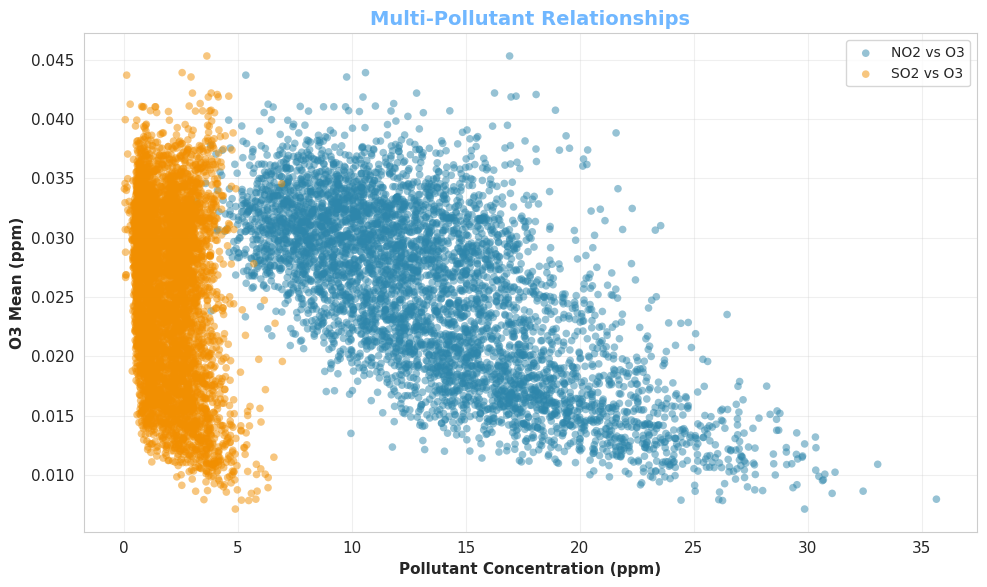


📊 Correlations of O3 Mean with NO2 and SO2:
   • NO2 Mean            : -0.6825
   • SO2 Mean            : -0.2383


In [ ]:
# Scatter plot: O3 vs other pollutants

# Take a small sample for plotting
sample_size = min(5000, len(df_model))
sample = df_model.sample(n=sample_size, random_state=42)

plt.figure(figsize=(10,6))

# Scatter plot: NO2 vs O3
plt.scatter(sample['NO2 Mean'], sample[target_col],
            alpha=0.5, s=30, color='#2E86AB', label='NO2 vs O3', edgecolors='none')

# Scatter plot: SO2 vs O3
plt.scatter(sample['SO2 Mean'], sample[target_col],
            alpha=0.5, s=30, color='#F18F01', label='SO2 vs O3', edgecolors='none')

# Customize the plot
plt.title('Multi-Pollutant Relationships', fontsize=14, fontweight='bold', color='#70B7FF')
plt.xlabel('Pollutant Concentration (ppm)', fontsize=11, fontweight='bold')
plt.ylabel(f'{target_col} (ppm)', fontsize=11, fontweight='bold')
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print correlations only for NO2 and SO2 with target
print(f"\n📊 Correlations of {target_col} with NO2 and SO2:")
for feature in ['NO2 Mean', 'SO2 Mean']:
    corr = corr_data[target_col][feature]
    print(f"   • {feature:20s}: {corr:+.4f}")


Data Preparation for LSTM Model


In [ ]:
# Mount Google Drive
import os
import pickle
from sklearn.preprocessing import MinMaxScaler

print("DATA NORMALIZATION")

# Extract target variable values
data = df_model[target_col].values.reshape(-1, 1)

# Initialize MinMaxScaler (scales data to range [0, 1])
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit scaler on data and transform
scaled_data = scaler.fit_transform(data)

print(f"📊 Normalization Statistics:")
print(f"   • Original range: [{data.min():.4f}, {data.max():.4f}] ppm")
print(f"   • Scaled range: [{scaled_data.min():.4f}, {scaled_data.max():.4f}]")
# Ensure 'models' folder exists in Google Drive
drive_models_path = '/content/drive/MyDrive/models'
os.makedirs(drive_models_path, exist_ok=True)

# Save scaler for deployment (needed for inverse transformation)
scaler_path = os.path.join(drive_models_path, 'scaler.pkl')
with open(scaler_path, 'wb') as f:
    pickle.dump(scaler, f)

print(f"\n✅ Scaler saved to Google Drive at: {scaler_path}")


DATA NORMALIZATION
📊 Normalization Statistics:
   • Original range: [0.0071, 0.0467] ppm
   • Scaled range: [0.0000, 1.0000]

✅ Scaler saved to Google Drive at: /content/drive/MyDrive/models/scaler.pkl


In [ ]:
# CREATE SEQUENCES FOR LSTM

print("CREATING TIME SERIES SEQUENCES")


def create_sequences(data, window_size):

    X, y = [], []

    for i in range(window_size, len(data)):
        # Input: previous 'window_size' values
        X.append(data[i - window_size:i, 0])
        # Output: next value
        y.append(data[i, 0])

    X = np.array(X)
    y = np.array(y)

    # Reshape X for LSTM input: (samples, timesteps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    return X, y

# Define lookback window (30 days of historical data)
WINDOW_SIZE = 30

# Create sequences
X, y = create_sequences(scaled_data, WINDOW_SIZE)

print(f"⚙️ Sequence Creation Configuration:")
print(f"   • Lookback window: {WINDOW_SIZE} days")
print(f"   • Total sequences created: {len(X):,}")
print(f"\n📊 Data Shapes:")
print(f"   • X shape: {X.shape} (samples, timesteps, features)")
print(f"   • y shape: {y.shape} (samples,)")



CREATING TIME SERIES SEQUENCES
⚙️ Sequence Creation Configuration:
   • Lookback window: 30 days
   • Total sequences created: 5,966

📊 Data Shapes:
   • X shape: (5966, 30, 1) (samples, timesteps, features)
   • y shape: (5966,) (samples,)


In [ ]:
# TRAIN-VALIDATION-TEST SPLIT

print("TRAIN-VALIDATION-TEST SPLIT")

# Define split ratios
TRAIN_RATIO = 0.70
VAL_RATIO = 0.15
TEST_RATIO = 0.15

# Calculate split indices
train_idx = int(len(X) * TRAIN_RATIO)
val_idx = int(len(X) * (TRAIN_RATIO + VAL_RATIO))

# Split data (NO SHUFFLING for time series!)
X_train, y_train = X[:train_idx], y[:train_idx]
X_val, y_val = X[train_idx:val_idx], y[train_idx:val_idx]
X_test, y_test = X[val_idx:], y[val_idx:]

print(f"📊 Data Split Configuration:")
print(f"   • Train ratio: {TRAIN_RATIO*100:.0f}%")
print(f"   • Validation ratio: {VAL_RATIO*100:.0f}%")
print(f"   • Test ratio: {TEST_RATIO*100:.0f}%")

print(f"\n📊 Dataset Sizes:")
print(f"   • Training set:   {len(X_train):,} samples ({TRAIN_RATIO*100:.0f}%)")
print(f"   • Validation set: {len(X_val):,} samples ({VAL_RATIO*100:.0f}%)")
print(f"   • Test set:       {len(X_test):,} samples ({TEST_RATIO*100:.0f}%)")

print("\n✅ Data splitting completed (chronological order preserved)")


TRAIN-VALIDATION-TEST SPLIT
📊 Data Split Configuration:
   • Train ratio: 70%
   • Validation ratio: 15%
   • Test ratio: 15%

📊 Dataset Sizes:
   • Training set:   4,176 samples (70%)
   • Validation set: 895 samples (15%)
   • Test set:       895 samples (15%)

✅ Data splitting completed (chronological order preserved)


## <span style="color:#70B7FF">🧠 LSTM Model Building </span>

Model Architecture:
 - Input Layer: 30 timesteps × 1 feature
 - LSTM Layer 1: 128 units with BatchNormalization and Dropout
 - LSTM Layer 2: 64 units with BatchNormalization and Dropout
 - Dense Layer 1: 32 units with ReLU activation
 - Dense Layer 2: 16 units with ReLU activation
 - Output Layer: 1 unit (next day prediction)


In [ ]:
# BUILD LSTM MODEL ARCHITECTURE

print("BUILDING LSTM MODEL")

# Clear any existing models from memory
keras.backend.clear_session()

# Build Sequential model
model = Sequential([
    # First LSTM layer with 128 units
    LSTM(128, return_sequences=True, activation='tanh',
         input_shape=(WINDOW_SIZE, 1),
         name='lstm_layer_1'),
    BatchNormalization(name='batch_norm_1'),
    Dropout(0.3, name='dropout_1'),

    # Second LSTM layer with 64 units
    LSTM(64, return_sequences=False, activation='tanh',
         name='lstm_layer_2'),
    BatchNormalization(name='batch_norm_2'),
    Dropout(0.3, name='dropout_2'),

    # Dense layers
    Dense(32, activation='relu', name='dense_1'),
    Dropout(0.2, name='dropout_3'),
    Dense(16, activation='relu', name='dense_2'),

    # Output layer
    Dense(1, name='output')
])

# Compile model with Adam optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='mse',
    metrics=['mae']
)

print("✅ Model architecture created successfully")
print("MODEL SUMMARY")

model.summary()

# Calculate model parameters
total_params = model.count_params()
print(f"\n📊 Total Parameters: {total_params:,}")
print(f"💾 Estimated Model Size: ~{(total_params * 4) / (1024**2):.2f} MB")


BUILDING LSTM MODEL
✅ Model architecture created successfully
MODEL SUMMARY


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_layer_1 (LSTM)             │ (None, 30, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 30, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_layer_2 (LSTM)             │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,361 (466.25 KB)

 Trainable params: 118,977 (464.75 KB)

 Non-trainable params: 384 (1.50 KB)


📊 Total Parameters: 119,361
💾 Estimated Model Size: ~0.46 MB


 Model Training with Hyperparameter Tuning


In [ ]:
# SETUP TRAINING CALLBACKS

print("CONFIGURING TRAINING CALLBACKS")
from tensorflow.keras.callbacks import ModelCheckpoint

# Callback 1: Early Stopping
# Stops training when validation loss stops improving
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1,
    mode='min'
)
print("✅ Early Stopping configured:")
print("   • Monitor: val_loss")
print("   • Patience: 15 epochs")
print("   • Restores best weights: True")

# Callback 2: Reduce Learning Rate on Plateau
# Reduces learning rate when validation loss plateaus
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=7,
    min_lr=1e-6,
    verbose=1,
    mode='min'
)
print("\n✅ ReduceLROnPlateau configured:")
print("   • Monitor: val_loss")
print("   • Factor: 0.5 (reduces LR by half)")
print("   • Patience: 7 epochs")
print("   • Min LR: 1e-6")

# Callback 3: Model Checkpoint
# Saves best model during training
checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/models/best_lstm_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1,
    mode='min'
)
print("\n✅ ModelCheckpoint configured:")
print("   • Save path: models/best_lstm_model.h5")
print("   • Saves only best model")


CONFIGURING TRAINING CALLBACKS
✅ Early Stopping configured:
   • Monitor: val_loss
   • Patience: 15 epochs
   • Restores best weights: True

✅ ReduceLROnPlateau configured:
   • Monitor: val_loss
   • Factor: 0.5 (reduces LR by half)
   • Patience: 7 epochs
   • Min LR: 1e-6

✅ ModelCheckpoint configured:
   • Save path: models/best_lstm_model.h5
   • Saves only best model


In [ ]:
# TRAIN THE MODEL
print("TRAINING LSTM MODEL")

# Training hyperparameters
EPOCHS = 100
BATCH_SIZE = 32

print(f"📊 Training Configuration:")
print(f"   • Epochs: {EPOCHS}")
print(f"   • Batch Size: {BATCH_SIZE}")
print(f"   • Optimizer: Adam (LR=0.001)")
print(f"   • Loss Function: MSE")
print(f"   • Metrics: MAE")

print("\n🚀 Starting training...\n")

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop, reduce_lr, checkpoint],
    verbose=1
)

print("✅ TRAINING COMPLETED!")

print(f"Total epochs trained: {len(history.history['loss'])}")
print(f"Best validation loss: {min(history.history['val_loss']):.6f}")


TRAINING LSTM MODEL
📊 Training Configuration:
   • Epochs: 100
   • Batch Size: 32
   • Optimizer: Adam (LR=0.001)
   • Loss Function: MSE
   • Metrics: MAE

🚀 Starting training...

Epoch 1/100
128/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3196 - mae: 0.4068
Epoch 1: val_loss improved from inf to 0.14217, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.3151 - mae: 0.4034 - val_loss: 0.1422 - val_mae: 0.3390 - learning_rate: 0.0010
Epoch 2/100
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0469 - mae: 0.1636
Epoch 2: val_loss improved from 0.14217 to 0.09349, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0468 - mae: 0.1635 - val_loss: 0.0935 - val_mae: 0.2710 - learning_rate: 0.0010
Epoch 3/100
128/131 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0330 - mae: 0.1407
Epoch 3: val_loss improved from 0.09349 to 0.06850, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0329 - mae: 0.1405 - val_loss: 0.0685 - val_mae: 0.2316 - learning_rate: 0.0010
Epoch 4/100
127/131 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0251 - mae: 0.1230
Epoch 4: val_loss improved from 0.06850 to 0.02754, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0251 - mae: 0.1230 - val_loss: 0.0275 - val_mae: 0.1436 - learning_rate: 0.0010
Epoch 5/100
128/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0207 - mae: 0.1125
Epoch 5: val_loss improved from 0.02754 to 0.01357, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0206 - mae: 0.1124 - val_loss: 0.0136 - val_mae: 0.0968 - learning_rate: 0.0010
Epoch 6/100
129/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0169 - mae: 0.1008
Epoch 6: val_loss improved from 0.01357 to 0.01153, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0169 - mae: 0.1008 - val_loss: 0.0115 - val_mae: 0.0886 - learning_rate: 0.0010
Epoch 7/100
126/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0151 - mae: 0.0972
Epoch 7: val_loss improved from 0.01153 to 0.00969, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0151 - mae: 0.0971 - val_loss: 0.0097 - val_mae: 0.0798 - learning_rate: 0.0010
Epoch 8/100
129/131 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0133 - mae: 0.0911
Epoch 8: val_loss improved from 0.00969 to 0.00963, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0133 - mae: 0.0910 - val_loss: 0.0096 - val_mae: 0.0796 - learning_rate: 0.0010
Epoch 9/100
126/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0130 - mae: 0.0898
Epoch 9: val_loss improved from 0.00963 to 0.00947, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0130 - mae: 0.0897 - val_loss: 0.0095 - val_mae: 0.0786 - learning_rate: 0.0010
Epoch 10/100
129/131 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0123 - mae: 0.0861 
Epoch 10: val_loss improved from 0.00947 to 0.00776, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0123 - mae: 0.0861 - val_loss: 0.0078 - val_mae: 0.0708 - learning_rate: 0.0010
Epoch 11/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0108 - mae: 0.0820
Epoch 11: val_loss improved from 0.00776 to 0.00685, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0108 - mae: 0.0820 - val_loss: 0.0069 - val_mae: 0.0664 - learning_rate: 0.0010
Epoch 12/100
126/131 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0108 - mae: 0.0819
Epoch 12: val_loss improved from 0.00685 to 0.00631, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0107 - mae: 0.0819 - val_loss: 0.0063 - val_mae: 0.0636 - learning_rate: 0.0010
Epoch 13/100
127/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0095 - mae: 0.0773
Epoch 13: val_loss improved from 0.00631 to 0.00625, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0095 - mae: 0.0772 - val_loss: 0.0063 - val_mae: 0.0629 - learning_rate: 0.0010
Epoch 14/100
127/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0093 - mae: 0.0764
Epoch 14: val_loss improved from 0.00625 to 0.00567, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0093 - mae: 0.0763 - val_loss: 0.0057 - val_mae: 0.0604 - learning_rate: 0.0010
Epoch 15/100
128/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0092 - mae: 0.0753
Epoch 15: val_loss did not improve from 0.00567
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0092 - mae: 0.0754 - val_loss: 0.0062 - val_mae: 0.0632 - learning_rate: 0.0010
Epoch 16/100
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0093 - mae: 0.0752
Epoch 16: val_loss did not improve from 0.00567
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0093 - mae: 0.0751 - val_loss: 0.0058 - val_mae: 0.0618 - learning_rate: 0.0010
Epoch 17/100
128/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0086 - mae: 0.0727
Epoch 17: val_loss improved from 0.00567 to 0.00529, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0086 - mae: 0.0727 - val_loss: 0.0053 - val_mae: 0.0593 - learning_rate: 0.0010
Epoch 18/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0085 - mae: 0.0734
Epoch 18: val_loss improved from 0.00529 to 0.00459, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0085 - mae: 0.0734 - val_loss: 0.0046 - val_mae: 0.0545 - learning_rate: 0.0010
Epoch 19/100
128/131 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0082 - mae: 0.0720
Epoch 19: val_loss did not improve from 0.00459
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0082 - mae: 0.0720 - val_loss: 0.0054 - val_mae: 0.0595 - learning_rate: 0.0010
Epoch 20/100
127/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0081 - mae: 0.0711
Epoch 20: val_loss did not improve from 0.00459
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0080 - mae: 0.0710 - val_loss: 0.0049 - val_mae: 0.0567 - learning_rate: 0.0010
Epoch 21/100
126/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0078 - mae: 0.0709
Epoch 21: val_loss improved from 0.00459 to 0.00455, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0078 - mae: 0.0708 - val_loss: 0.0045 - val_mae: 0.0547 - learning_rate: 0.0010
Epoch 22/100
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0074 - mae: 0.0686
Epoch 22: val_loss improved from 0.00455 to 0.00405, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0074 - mae: 0.0686 - val_loss: 0.0041 - val_mae: 0.0516 - learning_rate: 0.0010
Epoch 23/100
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0077 - mae: 0.0697
Epoch 23: val_loss did not improve from 0.00405
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0077 - mae: 0.0696 - val_loss: 0.0048 - val_mae: 0.0564 - learning_rate: 0.0010
Epoch 24/100
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0072 - mae: 0.0678
Epoch 24: val_loss did not improve from 0.00405
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0072 - mae: 0.0678 - val_loss: 0.0048 - val_mae: 0.0558 - learning_rate: 0.0010
Epoch 25/100
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0071 - mae: 0.0672
Epoch 25: val_loss did not improve from 0.00405
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0071 - mae: 0.0672 - val_loss: 0.0051 - val_mae: 0.0577 - learning_rate: 0.0010
Epoch 26/100
128/131 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0069 - mae:

131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0067 - mae: 0.0656 - val_loss: 0.0039 - val_mae: 0.0506 - learning_rate: 0.0010
Epoch 30/100
129/131 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0065 - mae: 0.0646
Epoch 30: val_loss did not improve from 0.00387
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0065 - mae: 0.0646 - val_loss: 0.0049 - val_mae: 0.0568 - learning_rate: 0.0010
Epoch 31/100
128/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0066 - mae: 0.0647
Epoch 31: val_loss did not improve from 0.00387
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0065 - mae: 0.0647 - val_loss: 0.0053 - val_mae: 0.0583 - learning_rate: 0.0010
Epoch 32/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0067 - mae: 0.0651
Epoch 32: val_loss improved from 0.00387 to 0.00386, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0067 - mae: 0.0651 - val_loss: 0.0039 - val_mae: 0.0502 - learning_rate: 0.0010
Epoch 33/100
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0063 - mae: 0.0635
Epoch 33: val_loss did not improve from 0.00386
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0063 - mae: 0.0635 - val_loss: 0.0053 - val_mae: 0.0600 - learning_rate: 0.0010
Epoch 34/100
129/131 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0064 - mae: 0.0638
Epoch 34: val_loss improved from 0.00386 to 0.00370, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0064 - mae: 0.0638 - val_loss: 0.0037 - val_mae: 0.0489 - learning_rate: 0.0010
Epoch 35/100
126/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0063 - mae: 0.0638
Epoch 35: val_loss improved from 0.00370 to 0.00321, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0063 - mae: 0.0637 - val_loss: 0.0032 - val_mae: 0.0457 - learning_rate: 0.0010
Epoch 36/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0062 - mae: 0.0629
Epoch 36: val_loss did not improve from 0.00321
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0062 - mae: 0.0629 - val_loss: 0.0032 - val_mae: 0.0464 - learning_rate: 0.0010
Epoch 37/100
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0063 - mae: 0.0627
Epoch 37: val_loss did not improve from 0.00321
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0063 - mae: 0.0627 - val_loss: 0.0034 - val_mae: 0.0471 - learning_rate: 0.0010
Epoch 38/100
129/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0060 - mae: 0.0623
Epoch 38: val_loss did not improve from 0.00321
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0060 - mae: 0.0623 - val_loss: 0.0037 - val_mae: 0.0497 - learning_rate: 0.0010
Epoch 39/100
128/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0061 - mae:

131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0058 - mae: 0.0603 - val_loss: 0.0031 - val_mae: 0.0452 - learning_rate: 2.5000e-04
Epoch 51/100
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0056 - mae: 0.0601
Epoch 51: val_loss did not improve from 0.00311
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0056 - mae: 0.0600 - val_loss: 0.0036 - val_mae: 0.0487 - learning_rate: 2.5000e-04
Epoch 52/100
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0057 - mae: 0.0607
Epoch 52: val_loss did not improve from 0.00311
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0057 - mae: 0.0607 - val_loss: 0.0033 - val_mae: 0.0464 - learning_rate: 2.5000e-04
Epoch 53/100
128/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055 - mae: 0.0591
Epoch 53: val_loss did not improve from 0.00311
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0055 - mae: 0.0591 - val_loss: 0.0031 - val_mae: 0.0454 - learning_rate: 2.5000e-04
Epoch 54/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - los

131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0056 - mae: 0.0601 - val_loss: 0.0030 - val_mae: 0.0445 - learning_rate: 1.2500e-04
Epoch 58/100
128/131 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0055 - mae: 0.0590
Epoch 58: val_loss improved from 0.00303 to 0.00298, saving model to /content/drive/MyDrive/models/best_lstm_model.h5


131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0055 - mae: 0.0590 - val_loss: 0.0030 - val_mae: 0.0446 - learning_rate: 1.2500e-04
Epoch 59/100
128/131 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0055 - mae: 0.0595
Epoch 59: val_loss did not improve from 0.00298
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0055 - mae: 0.0595 - val_loss: 0.0030 - val_mae: 0.0444 - learning_rate: 1.2500e-04
Epoch 60/100
128/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055 - mae: 0.0591
Epoch 60: val_loss did not improve from 0.00298
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0055 - mae: 0.0590 - val_loss: 0.0031 - val_mae: 0.0449 - learning_rate: 1.2500e-04
Epoch 61/100
126/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0054 - mae: 0.0586
Epoch 61: val_loss did not improve from 0.00298
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0054 - mae: 0.0585 - val_loss: 0.0031 - val_mae: 0.0452 - learning_rate: 1.2500e-04
Epoch 62/100
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - los

131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0055 - mae: 0.0585 - val_loss: 0.0029 - val_mae: 0.0437 - learning_rate: 1.2500e-04
Epoch 65/100
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055 - mae: 0.0589
Epoch 65: val_loss did not improve from 0.00288
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0055 - mae: 0.0589 - val_loss: 0.0030 - val_mae: 0.0444 - learning_rate: 1.2500e-04
Epoch 66/100
129/131 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0053 - mae: 0.0581
Epoch 66: val_loss did not improve from 0.00288
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0053 - mae: 0.0581 - val_loss: 0.0030 - val_mae: 0.0442 - learning_rate: 1.2500e-04
Epoch 67/100
129/131 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0053 - mae: 0.0578
Epoch 67: val_loss did not improve from 0.00288
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0053 - mae: 0.0578 - val_loss: 0.0032 - val_mae: 0.0460 - learning_rate: 1.2500e-04
Epoch 68/100
127/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - los

131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0053 - mae: 0.0579 - val_loss: 0.0029 - val_mae: 0.0434 - learning_rate: 6.2500e-05
Epoch 74/100
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0053 - mae: 0.0582
Epoch 74: val_loss did not improve from 0.00288
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0053 - mae: 0.0581 - val_loss: 0.0029 - val_mae: 0.0438 - learning_rate: 6.2500e-05
Epoch 75/100
128/131 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0054 - mae: 0.0585
Epoch 75: val_loss did not improve from 0.00288
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0054 - mae: 0.0584 - val_loss: 0.0030 - val_mae: 0.0444 - learning_rate: 6.2500e-05
Epoch 76/100
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0053 - mae: 0.0583
Epoch 76: val_loss did not improve from 0.00288
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0053 - mae: 0.0583 - val_loss: 0.0030 - val_mae: 0.0447 - learning_rate: 6.2500e-05
Epoch 77/100
130/131 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - los

VISUALIZING TRAINING HISTORY


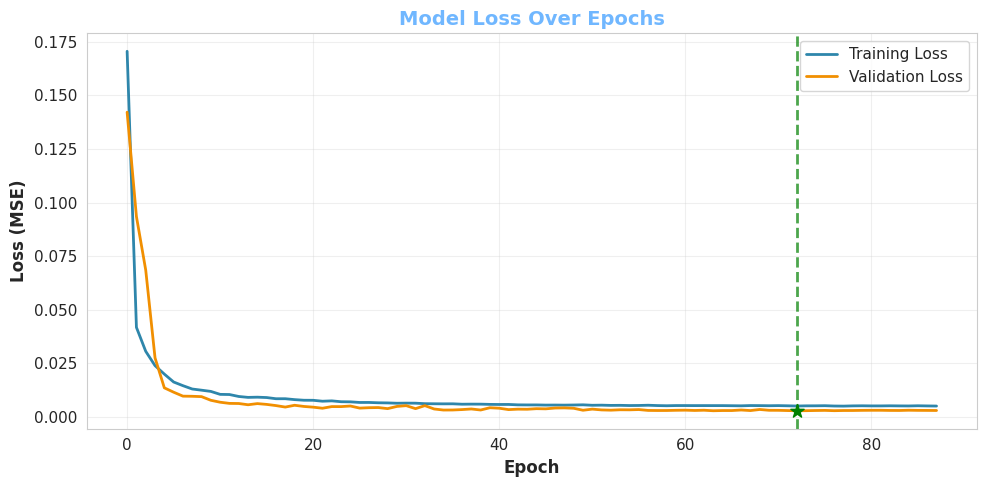

In [ ]:
# VISUALIZE TRAINING HISTORY

print("VISUALIZING TRAINING HISTORY")

plt.figure(figsize=(10, 5))

# Plot Loss curves
plt.plot(history.history['loss'], label='Training Loss', linewidth=2, color='#2E86AB')
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='#F18F01')
plt.title('Model Loss Over Epochs', fontsize=14, fontweight='bold', color='#70B7FF')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('Loss (MSE)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right', fontsize=11)

# Mark best epoch
best_epoch = np.argmin(history.history['val_loss'])
best_val_loss = history.history['val_loss'][best_epoch]
plt.axvline(x=best_epoch, color='green', linestyle='--', linewidth=2, alpha=0.7, label=f'Best Epoch: {best_epoch+1}')
plt.scatter(best_epoch, best_val_loss, color='green', s=100, zorder=5, marker='*')

plt.tight_layout()
plt.show()


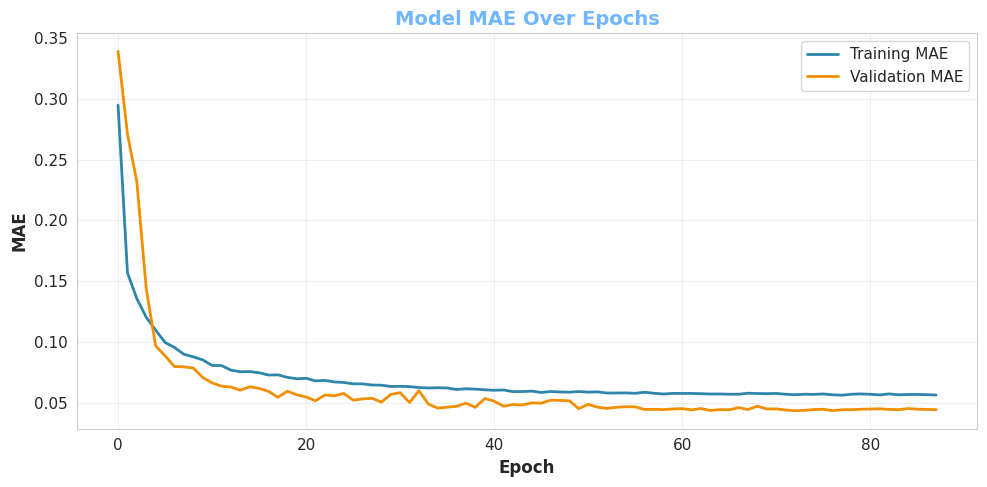

✅ Training history visualized


In [ ]:
# Plot MAE curves in a single figure
plt.figure(figsize=(10,5))

plt.plot(history.history['mae'], label='Training MAE',
         linewidth=2, color='#2E86AB')
plt.plot(history.history['val_mae'], label='Validation MAE',
         linewidth=2, color='#F18F01')

plt.title('Model MAE Over Epochs',
          fontsize=14, fontweight='bold', color='#70B7FF')
plt.xlabel('Epoch', fontsize=12, fontweight='bold')
plt.ylabel('MAE', fontsize=12, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Training history visualized")


### Model Evaluation

 **Comprehensive evaluation including:**
 - Predictions on validation and test sets
 - Performance metrics: MSE, MAE, RMSE, R²
 - Visual comparison of predictions vs actual values
 - Error distribution analysis

In [ ]:
# MAKE PREDICTIONS ON VALIDATION AND TEST SETS

print("GENERATING PREDICTIONS")

# Predict on validation set
print("📊 Predicting on validation set...")
y_val_pred = model.predict(X_val, verbose=0)

# Predict on test set
print("📊 Predicting on test set...")
y_test_pred = model.predict(X_test, verbose=0)

# Inverse transform to original scale
y_val_original = scaler.inverse_transform(y_val.reshape(-1, 1))
y_val_pred_original = scaler.inverse_transform(y_val_pred)

y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred_original = scaler.inverse_transform(y_test_pred)
print(y_val_pred_original[:5])

print("✅ Predictions completed and inverse-transformed to original scale")


GENERATING PREDICTIONS
📊 Predicting on validation set...
📊 Predicting on test set...
[[0.03288792]
 [0.0308515 ]
 [0.03290242]
 [0.03277611]
 [0.03254165]]
✅ Predictions completed and inverse-transformed to original scale


In [ ]:
# CALCULATE PERFORMANCE METRICS

print("CALCULATING PERFORMANCE METRICS")

# Validation set metrics
val_mse = mean_squared_error(y_val_original, y_val_pred_original)
val_mae = mean_absolute_error(y_val_original, y_val_pred_original)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val_original, y_val_pred_original)

print("📊 VALIDATION SET PERFORMANCE:")
print(f"   • Mean Squared Error (MSE):       {val_mse:.6f}")
print(f"   • Mean Absolute Error (MAE):      {val_mae:.6f}")
print(f"   • Root Mean Squared Error (RMSE): {val_rmse:.6f}")
print(f"   • R² Score:                       {val_r2:.6f}")

# Test set metrics
test_mse = mean_squared_error(y_test_original, y_test_pred_original)
test_mae = mean_absolute_error(y_test_original, y_test_pred_original)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_original, y_test_pred_original)

print("\n📊 TEST SET PERFORMANCE:")
print(f"   • Mean Squared Error (MSE):       {test_mse:.6f}")
print(f"   • Mean Absolute Error (MAE):      {test_mae:.6f}")
print(f"   • Root Mean Squared Error (RMSE): {test_rmse:.6f}")
print(f"   • R² Score:                       {test_r2:.6f}")

# Calculate percentage errors
val_mape = np.mean(np.abs((y_val_original - y_val_pred_original) / y_val_original)) * 100
test_mape = np.mean(np.abs((y_test_original - y_test_pred_original) / y_test_original)) * 100

print("\n📊 PERCENTAGE ERRORS:")
print(f"   • Validation MAPE: {val_mape:.2f}%")
print(f"   • Test MAPE:       {test_mape:.2f}%")

CALCULATING PERFORMANCE METRICS
📊 VALIDATION SET PERFORMANCE:
   • Mean Squared Error (MSE):       0.000004
   • Mean Absolute Error (MAE):      0.001718
   • Root Mean Squared Error (RMSE): 0.002121
   • R² Score:                       0.902147

📊 TEST SET PERFORMANCE:
   • Mean Squared Error (MSE):       0.000004
   • Mean Absolute Error (MAE):      0.001638
   • Root Mean Squared Error (RMSE): 0.002101
   • R² Score:                       0.879826

📊 PERCENTAGE ERRORS:
   • Validation MAPE: 7.02%
   • Test MAPE:       6.46%


In [ ]:
# SAVE METRICS TO JSON

print("SAVING METRICS")

# Prepare metrics dictionary
metrics_dict = {
    'target_column': target_col,
    'window_size': WINDOW_SIZE,
    'train_samples': int(len(X_train)),
    'val_samples': int(len(X_val)),
    'test_samples': int(len(X_test)),
    'epochs_trained': len(history.history['loss']),
    'best_epoch': int(best_epoch + 1),
    'validation_metrics': {
        'mse': float(val_mse),
        'mae': float(val_mae),
        'rmse': float(val_rmse),
        'r2': float(val_r2),
        'mape': float(val_mape)
    },
    'test_metrics': {
        'mse': float(test_mse),
        'mae': float(test_mae),
        'rmse': float(test_rmse),
        'r2': float(test_r2),
        'mape': float(test_mape)
    }
}

# Save to JSON file
drive_metrics_path = '/content/drive/MyDrive/models/metrics.json'
with open(drive_metrics_path, "w") as f:
    json.dump(metrics_dict, f, indent=4)

print("✅ Metrics saved to: models/metrics.json")


SAVING METRICS
✅ Metrics saved to: models/metrics.json


VISUALIZING PREDICTIONS VS ACTUAL VALUES (SINGLE PLOT)


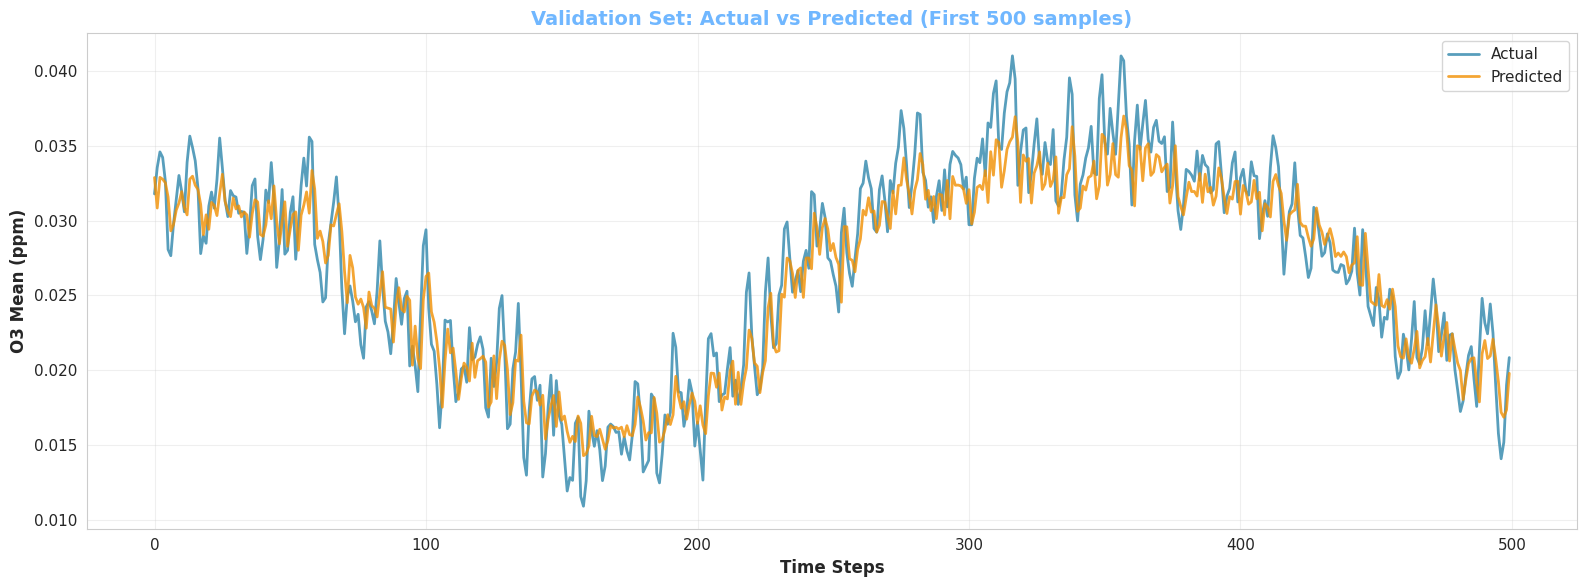

In [ ]:
# VISUALIZATION: PREDICTIONS VS ACTUAL (Single Plot)

print("VISUALIZING PREDICTIONS VS ACTUAL VALUES (SINGLE PLOT)")

plt.figure(figsize=(16, 6))

# Time series comparison - Validation set (first 500 samples)
plot_samples_val = min(500, len(y_val_original))
plt.plot(y_val_original[:plot_samples_val],
         label='Actual', linewidth=2, alpha=0.8, color='#2E86AB')
plt.plot(y_val_pred_original[:plot_samples_val],
         label='Predicted', linewidth=2, alpha=0.8, color='#F18F01')

plt.title(f'Validation Set: Actual vs Predicted (First {plot_samples_val} samples)',
          fontsize=14, fontweight='bold', color='#70B7FF')
plt.xlabel('Time Steps', fontsize=12, fontweight='bold')
plt.ylabel(f'{target_col} (ppm)', fontsize=12, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


 Multi-Step Forecasting


In [ ]:
# FUTURE FORECASTING FUNCTION

print("MULTI-STEP FORECASTING FUNCTION")

def forecast_future_days(model, last_sequence, scaler, n_days=7):
    """
    Forecast future values using trained LSTM model

    Parameters:
    -----------
    model : keras.Model
        Trained LSTM model
    last_sequence : np.array
        Last WINDOW_SIZE values (scaled)
    scaler : MinMaxScaler
        Fitted scaler for inverse transformation
    n_days : int
        Number of days to forecast

    Returns:
    --------
    predictions : np.array
        Forecasted values in original scale
    """
    predictions = []
    current_sequence = last_sequence.copy()

    for _ in range(n_days):
        # Predict next day
        next_pred = model.predict(
            current_sequence.reshape(1, WINDOW_SIZE, 1),
            verbose=0
        )
        predictions.append(next_pred[0, 0])

        # Update sequence: remove oldest value, add newest prediction
        current_sequence = np.append(current_sequence[1:], next_pred)

    # Convert predictions back to original scale
    predictions = scaler.inverse_transform(
        np.array(predictions).reshape(-1, 1)
    )

    return predictions.flatten()

print("✅ Forecasting function defined")


MULTI-STEP FORECASTING FUNCTION
✅ Forecasting function defined



EXAMPLE: FORECASTING NEXT 7 DAYS

📊 Forecasted O3 Mean for Next 7 Days:
   Day 1: 0.0323 ppm - Good 🟢
   Day 2: 0.0319 ppm - Good 🟢
   Day 3: 0.0316 ppm - Good 🟢
   Day 4: 0.0315 ppm - Good 🟢
   Day 5: 0.0314 ppm - Good 🟢
   Day 6: 0.0313 ppm - Good 🟢
   Day 7: 0.0312 ppm - Good 🟢

VISUALIZING FORECAST


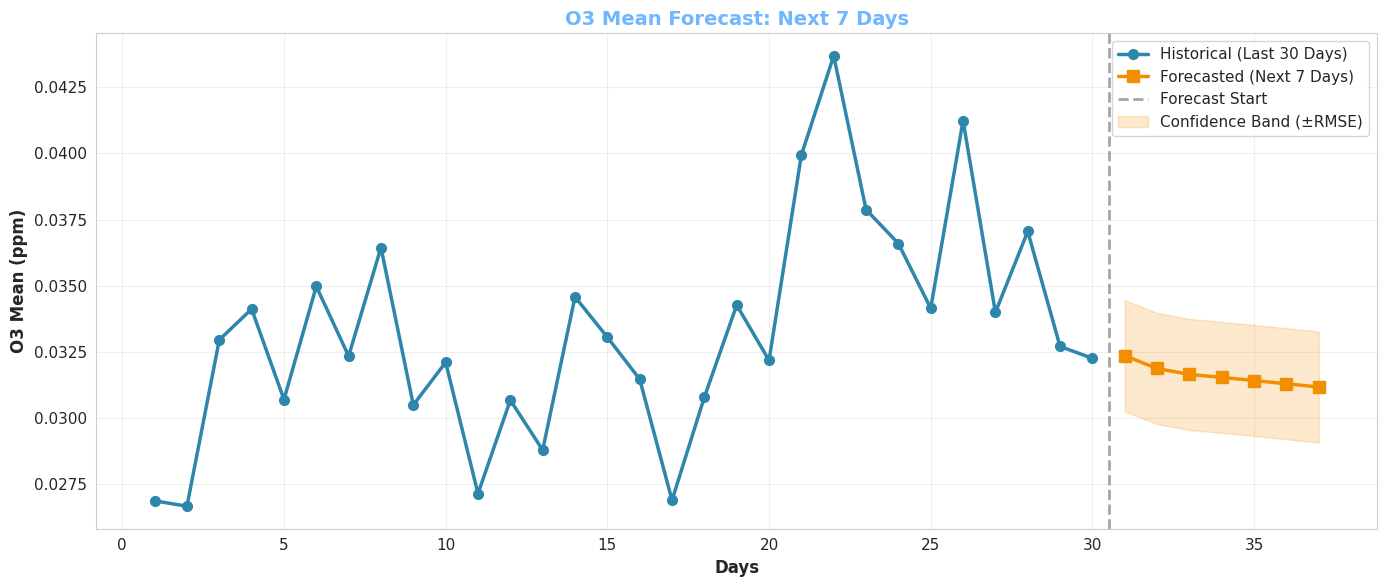

✅ Forecast visualization created


In [ ]:
# EXAMPLE FORECAST: NEXT 7 DAYS

print("\n" + "=" * 60)
print("EXAMPLE: FORECASTING NEXT 7 DAYS")
print("=" * 60)

# Use the last 30 days from test set as input
last_30_days = X_test[-1].reshape(-1)

# Forecast next 7 days
FORECAST_DAYS = 7
future_predictions = forecast_future_days(model, last_30_days, scaler, n_days=FORECAST_DAYS)

print(f"\n📊 Forecasted {target_col} for Next {FORECAST_DAYS} Days:")
for i, pred in enumerate(future_predictions, 1):
    # Interpret air quality level
    if pred <= 50:
        level = "Good 🟢"
    elif pred <= 100:
        level = "Moderate 🟡"
    elif pred <= 150:
        level = "Unhealthy for Sensitive Groups 🟠"
    else:
        level = "Unhealthy 🔴"

    print(f"   Day {i}: {pred:.4f} ppm - {level}")

# %%
# VISUALIZE FORECAST

print("\n" + "=" * 60)
print("VISUALIZING FORECAST")
print("=" * 60)

plt.figure(figsize=(14, 6))

# Plot historical data (last 30 days)
last_30_actual = scaler.inverse_transform(last_30_days.reshape(-1, 1)).flatten()
plt.plot(range(1, 31), last_30_actual, 'o-',
         label='Historical (Last 30 Days)',
         linewidth=2.5, markersize=7, color='#2E86AB')

# Plot forecasted days
plt.plot(range(31, 31 + FORECAST_DAYS), future_predictions, 's-',
         label=f'Forecasted (Next {FORECAST_DAYS} Days)',
         linewidth=2.5, markersize=9, color='#F18F01')

# Add vertical line at forecast boundary
plt.axvline(x=30.5, color='gray', linestyle='--',
            alpha=0.7, linewidth=2, label='Forecast Start')

# Add confidence band (simple approximation using test RMSE)
forecast_std = test_rmse
plt.fill_between(range(31, 31 + FORECAST_DAYS),
                 future_predictions - forecast_std,
                 future_predictions + forecast_std,
                 alpha=0.2, color='#F18F01', label='Confidence Band (±RMSE)')

plt.title(f'{target_col} Forecast: Next {FORECAST_DAYS} Days',
          fontsize=14, fontweight='bold', color='#70B7FF')
plt.xlabel('Days', fontsize=12, fontweight='bold')
plt.ylabel(f'{target_col} (ppm)', fontsize=12, fontweight='bold')
plt.legend(loc='upper right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Forecast visualization created")

## <span style="color:#70B7FF">📋 Final Summary</span>


In [1]:
print("\n" + "=" * 70)
print(" " * 20 + "FINAL PROJECT SUMMARY")
print("=" * 70)

print("""
                    DATASET INFORMATION

Original Dataset:
  • Total Records: 1,746,661
  • Total Features: 29
  • Date Range: 2000-2016 (16 years)

After Preprocessing:
  • Records After Cleaning: 1,746,661
  • Records After Daily Aggregation: 5,996 days
  • Target Variable: O3 Mean


======================================================================
            PREPROCESSING PIPELINE
======================================================================

✅ 1. Missing Values Handling:
     • SO2 AQI & CO AQI (~50% missing) → Excluded
     • Remaining features → rows with missing values dropped

✅ 2. Data Cleaning:
     • No duplicated rows

✅ 3. Categorical Variables Encoding:
     • State: 47 unique states encoded
     • City: 144 unique cities encoded
     • Method: LabelEncoder

✅ 4. Feature Engineering:
     • Temporal features: Year, Month, Day, DayOfWeek, Quarter, DayOfYear
     • Cyclical features: Month_Sin/Cos, DayOfYear_Sin/Cos
     • Purpose: Capture seasonal patterns

✅ 5. Daily Aggregation:
     • Grouped by date and computed daily mean
     • Reduced noise and improved stability
     • Result: 5,996 days of clean data

✅ 6. Outlier Treatment:
     • Method: IQR (Interquartile Range)
     • Strategy: Capping to bounds (preserve extreme events)
     • Outliers detected: 0 (0.00%)

✅ 7. Data Splitting:
     • Training: 4,176 samples (70%)
     • Validation: 895 samples (15%)
     • Test: 895 samples (15%)
     • Method: Chronological split (no shuffling)

✅ 8. Normalization:
     • Method: MinMaxScaler [0, 1]
     • Applied to: O3 Mean
     • Scaler saved for deployment

======================================================================
        EXPLORATORY DATA ANALYSIS
======================================================================

✅ Time series, seasonal, and correlation analyses performed.

======================================================================
            MODELING & EVALUATION
======================================================================

✅ Hyperparameters:
     • Lookback Window: 30 days
     • Batch Size: 32
     • Learning Rate: 0.001 (Adam optimizer)
     • Epochs: 88 (with early stopping)
     • Best Epoch: 73

🎯 MODEL PERFORMANCE SUMMARY:
   • Validation R²: 0.9021 → 90.2% variance explained
   • Test R²: 0.8798 → 88.0% variance explained
   • Average Error (MAE): ~0.0016 ppm
   • Model is STABLE and GENERALIZES WELL
""")

print("\n" + "=" * 70)
print(" " * 15 + "🎉 NOTEBOOK EXECUTION COMPLETE 🎉")
print("=" * 70)


                    FINAL PROJECT SUMMARY

                    DATASET INFORMATION

Original Dataset:
  • Total Records: 1,746,661
  • Total Features: 29
  • Date Range: 2000-2016 (16 years)

After Preprocessing:
  • Records After Cleaning: 1,746,661
  • Records After Daily Aggregation: 5,996 days
  • Target Variable: O3 Mean
  

            PREPROCESSING PIPELINE

✅ 1. Missing Values Handling:
     • SO2 AQI & CO AQI (~50% missing) → Excluded
     • Remaining features → rows with missing values dropped

✅ 2. Data Cleaning:
     • No duplicated rows

✅ 3. Categorical Variables Encoding:
     • State: 47 unique states encoded
     • City: 144 unique cities encoded
     • Method: LabelEncoder

✅ 4. Feature Engineering:
     • Temporal features: Year, Month, Day, DayOfWeek, Quarter, DayOfYear
     • Cyclical features: Month_Sin/Cos, DayOfYear_Sin/Cos
     • Purpose: Capture seasonal patterns

✅ 5. Daily Aggregation:
     • Grouped by date and computed daily mean
     • Reduced noise and 